## Aula 11a - Func. Básicas OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread('Figuras/Alu.bmp', cv2.IMREAD_GRAYSCALE)


Number of particles: 42


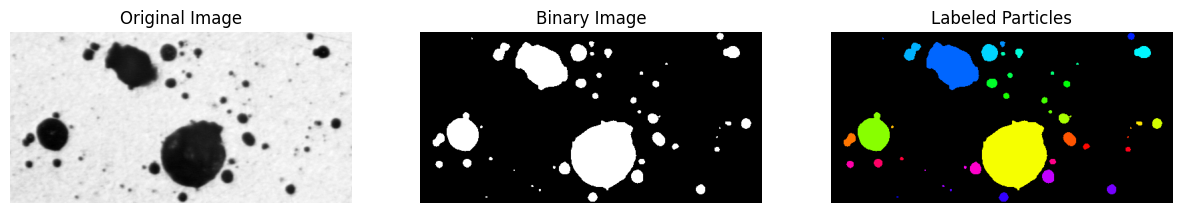

In [4]:
# Binarize the image using Otsu's method and invert
_, binary = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

# Print the number of particles (subtract 1 to exclude background)
print(f"Number of particles: {num_labels - 1}")

# Create a color image to visualize the labeled components
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# Set background to black
labeled_img[labels == 0] = 0

# Display original, binary and labeled images
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(labeled_img)
plt.title('Labeled Particles')
plt.axis('off')
plt.show()


Number of particles: 42


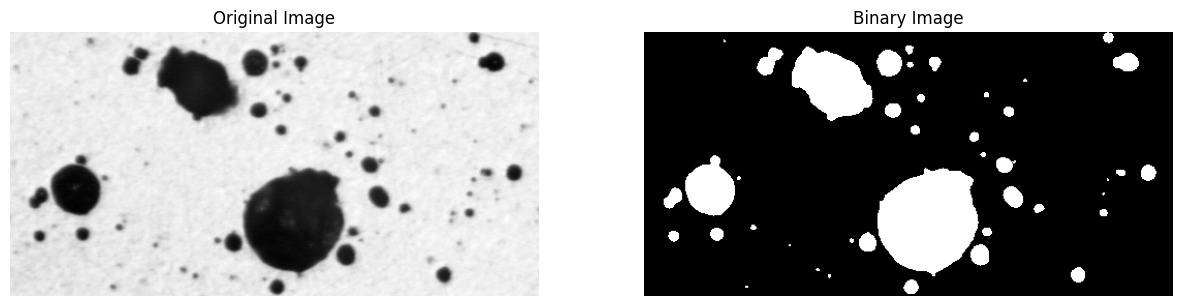

In [5]:
params = cv2.SimpleBlobDetector_Params()

params.filterByColor = True

params.blobColor = 255

# Filter by Area
params.filterByArea = True
params.minArea = 1
params.maxArea = 20000

# Filter by Circularity
params.filterByCircularity = False
# params.minCircularity = 0.8
# #params.maxCircularity = 1.2

# Filter by Convexity
params.filterByConvexity = False
#params.minConvexity = 0.87
#params.maxConvexity = 1

# Filter by Inertia
params.filterByInertia = False
#params.minInertiaRatio = 0.01
#params.maxInertiaRatio = 1

detector = cv2.SimpleBlobDetector_create(params)

KP = detector.detect(binary)

print(f"Number of particles: {len(KP)}")

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()



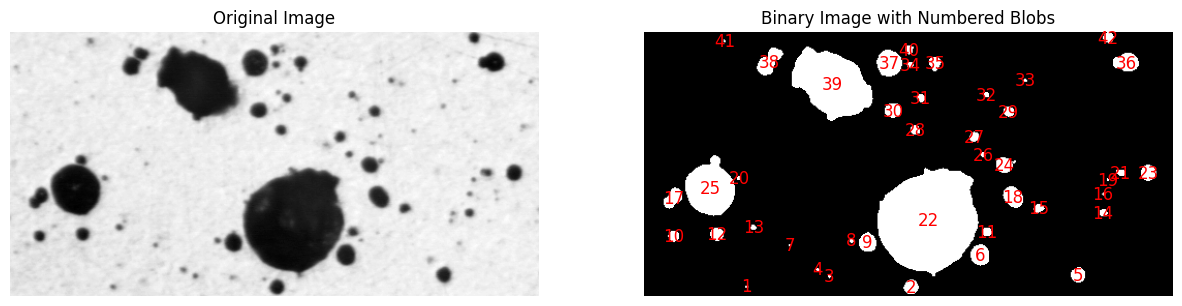

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image with Numbered Blobs')
plt.axis('off')

# Draw keypoints and numbers
for idx, kp in enumerate(KP):
    x, y = kp.pt  # Get coordinates of keypoint
    plt.text(x, y, str(idx+1), color='red', fontsize=12, 
             horizontalalignment='center', verticalalignment='center')
    
plt.show()


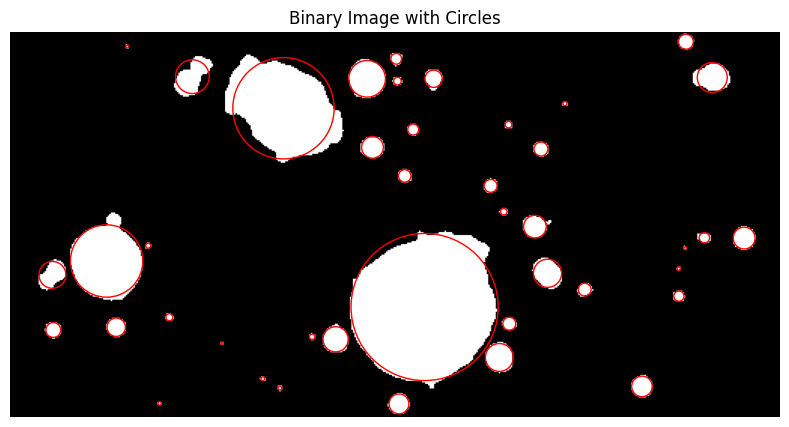

In [7]:
plt.figure(figsize=(15, 5))
plt.imshow(binary, cmap='gray')
plt.title('Binary Image with Circles')
plt.axis('off')

# Draw circles around blobs
for kp in KP:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    plt.gca().add_patch(circle)
    
plt.show()


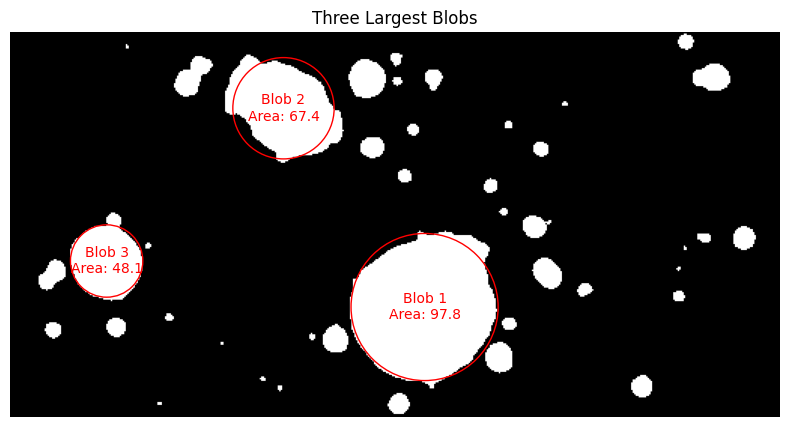

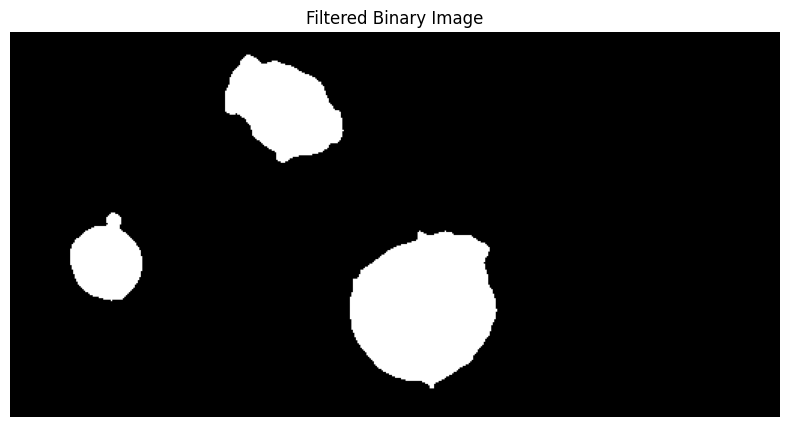

In [8]:
from library.selectBlob import selectBlob

# Sort keypoints by size (area) in descending order
sorted_KP = sorted(KP, key=lambda x: x.size, reverse=True)

# Get the three largest blobs
largest_blobs = sorted_KP[:3]

plt.figure(figsize=(15, 5))
plt.imshow(binary, cmap='gray')
plt.title('Three Largest Blobs')
plt.axis('off')

# Draw circles around the three largest blobs
for idx, kp in enumerate(largest_blobs):
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    plt.gca().add_patch(circle)
    # Add blob number
    plt.text(x, y, f'Blob {idx+1}\nArea: {size:.1f}', color='red', fontsize=10,
             horizontalalignment='center', verticalalignment='center')
    
plt.show()

img_bin_filter = selectBlob(binary, sorted_KP[:3])
plt.figure(figsize=(15, 5))
plt.imshow(img_bin_filter, cmap='gray')
plt.title('Filtered Binary Image')
plt.axis('off')
plt.show()




In [9]:
img2_right = cv2.imread('Figuras/Metal.jpg', cv2.IMREAD_GRAYSCALE)


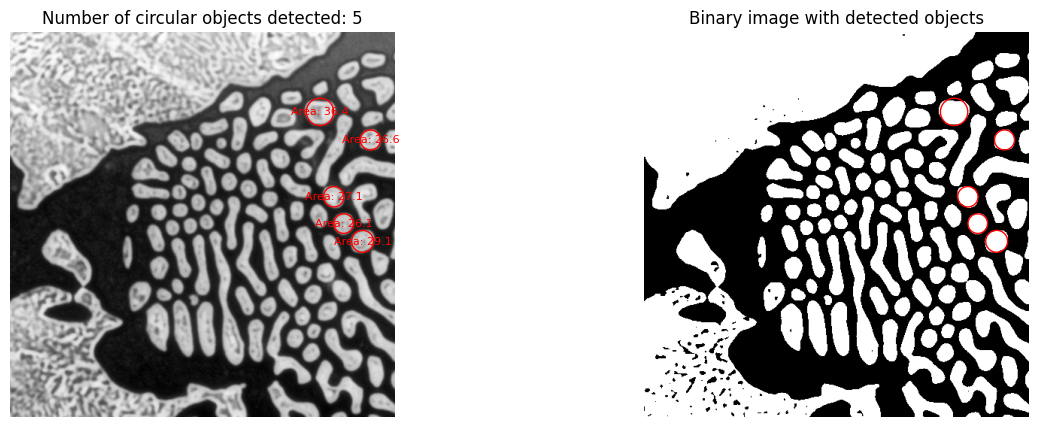

In [10]:
# Binarize the image using Otsu's thresholding
_, binary_right = cv2.threshold(img2_right, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set up blob detection parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by area
params.filterByColor = True

params.blobColor = 255

# Filter by Area
params.filterByArea = True
params.minArea = 500
params.maxArea = 20000

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.85
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = False
#params.minConvexity = 0.5
#params.maxConvexity = 1

# Filter by Inertia
params.filterByInertia = False
#params.minInertiaRatio = 0.01
#params.maxInertiaRatio = 1

# Create detector
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(binary_right)

# Sort keypoints by size
sorted_keypoints = sorted(keypoints, key=lambda x: x.size, reverse=True)

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original image with circles
ax1.imshow(img2_right, cmap='gray')
ax1.set_title(f'Number of circular objects detected: {len(keypoints)}')
ax1.axis('off')

for kp in sorted_keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax1.add_patch(circle)
    ax1.text(x, y, f'Area: {size:.1f}', color='red', fontsize=8,
             horizontalalignment='center', verticalalignment='center')

# Binary thresholded image with circles
_, binary = cv2.threshold(binary_right, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Binary image with detected objects')
ax2.axis('off')

for kp in sorted_keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax2.add_patch(circle)

plt.show()



In [11]:
img2 = cv2.imread('Figuras/Ovos1_u8.bmp', cv2.IMREAD_GRAYSCALE)

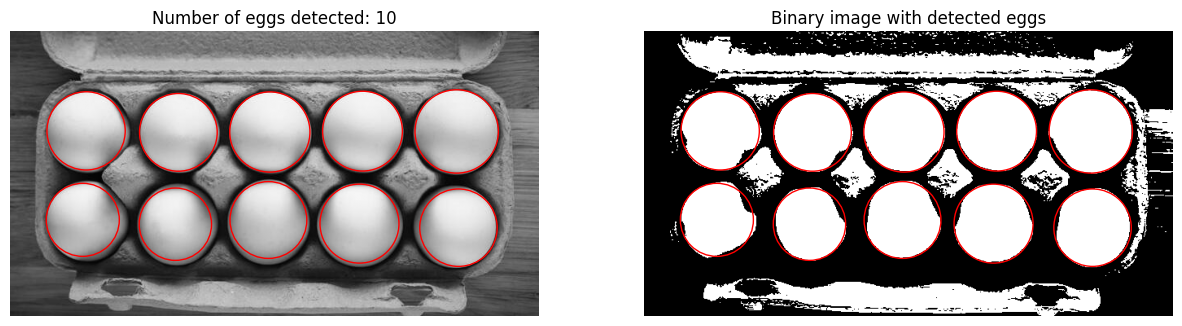

In [12]:
_, binary2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.maxArea = 20000
params.filterByCircularity = True
params.minCircularity = 0.6 
params.filterByConvexity = True
params.minConvexity = 0.8

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(255 - binary2) 

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original image with circles
ax1.imshow(img2, cmap='gray')
ax1.set_title(f'Number of eggs detected: {len(keypoints)}')
ax1.axis('off')

for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax1.add_patch(circle)

# Binary image with circles
ax2.imshow(binary2, cmap='gray')
ax2.set_title('Binary image with detected eggs')
ax2.axis('off')

for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax2.add_patch(circle)

plt.show()


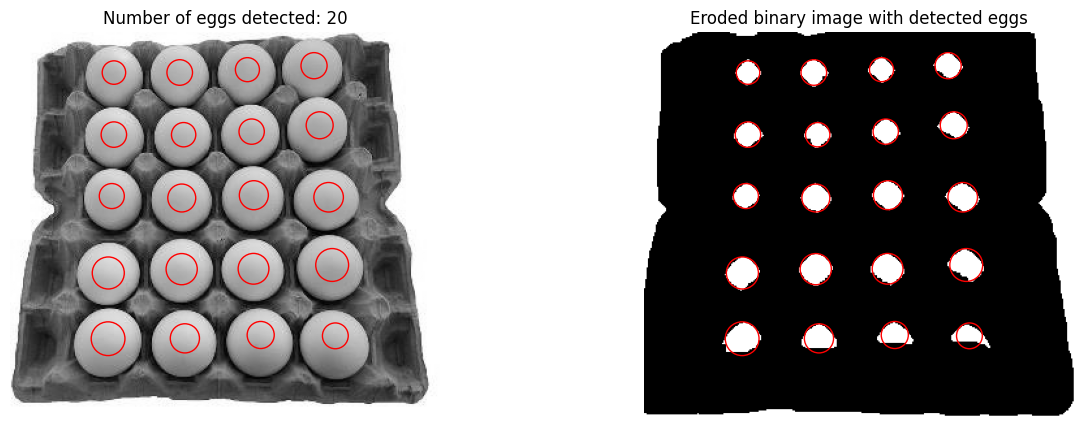

In [13]:
img3 = cv2.imread('Figuras/Ovos2_u8.bmp', cv2.IMREAD_GRAYSCALE)

_, binary3 = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply erosion
kernel = np.ones((18,18), np.uint8)
binary3_eroded = cv2.erode(binary3, kernel, iterations=1)

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.maxArea = 20000
params.filterByCircularity = True
params.minCircularity = 0.2
params.filterByConvexity = True
params.minConvexity = 0.5

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(255 - binary3_eroded)

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original image with circles
ax1.imshow(img3, cmap='gray')
ax1.set_title(f'Number of eggs detected: {len(keypoints)}')
ax1.axis('off')

for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax1.add_patch(circle)

# Binary image with circles
ax2.imshow(binary3_eroded, cmap='gray')
ax2.set_title('Eroded binary image with detected eggs')
ax2.axis('off')

for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    circle = plt.Circle((x, y), size/2, color='red', fill=False)
    ax2.add_patch(circle)

plt.show()


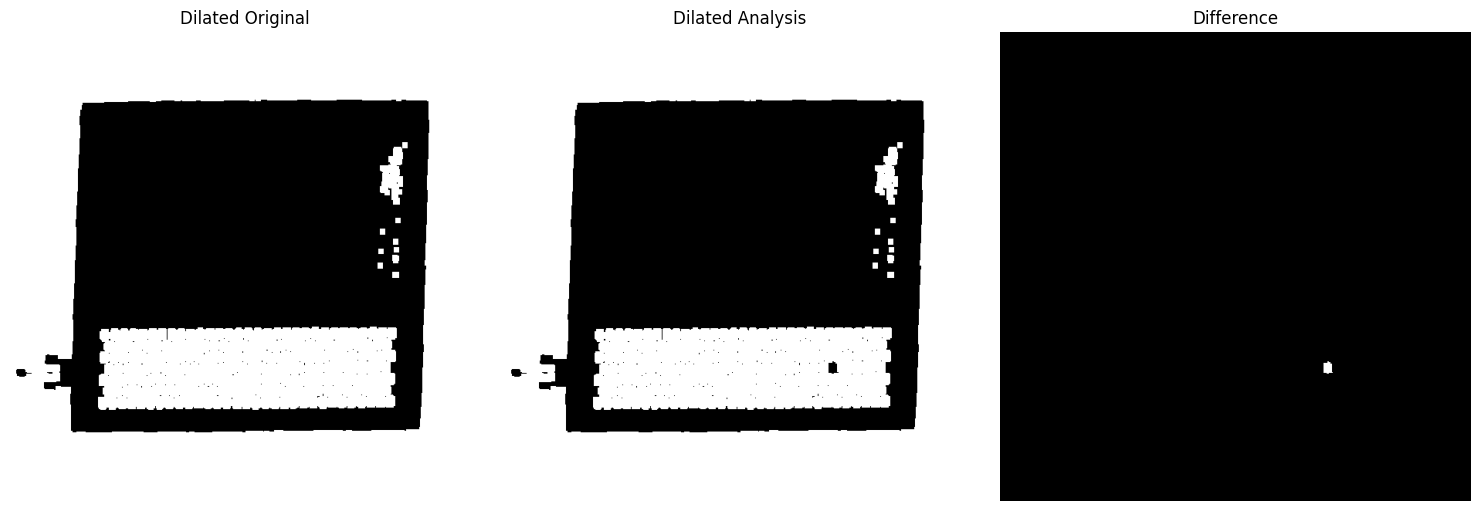

In [28]:
img_original = cv2.imread('Figuras/Caixa1.PNG.png', cv2.IMREAD_GRAYSCALE)
img_analise = cv2.imread('Figuras/Caixa2.PNG.png', cv2.IMREAD_GRAYSCALE)

_, binary_original = cv2.threshold(img_original, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, binary_analise = cv2.threshold(img_analise, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply dilation to both binary images
kernel = np.ones((7, 7), np.uint8)
dilated_original = cv2.dilate(binary_original, kernel, iterations=1)
dilated_analise = cv2.dilate(binary_analise, kernel, iterations=1)

difference = cv2.absdiff(dilated_original, dilated_analise)

# Create a copy of the analysis image for visualization
img_result = cv2.cvtColor(img_analise, cv2.COLOR_GRAY2BGR)

# Find the location of the fail using image moments instead of contours
m = cv2.moments(difference)
if m["m00"] > 0:  # Check if there are any non-zero pixels
    # Calculate center of mass
    cx = int(m["m10"] / m["m00"])
    cy = int(m["m01"] / m["m00"])
    
    # Calculate an appropriate radius based on the area of the difference
    area = np.sum(difference > 0)
    radius = int(np.sqrt(area / np.pi))
    
    # Draw the circle on the result image
    cv2.circle(img_result, (cx, cy), radius, (0, 0, 255), 2)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(dilated_original, cmap='gray')
axes[0].set_title('Dilated Original')
axes[0].axis('off')

axes[1].imshow(dilated_analise, cmap='gray')
axes[1].set_title('Dilated Analysis')
axes[1].axis('off')

axes[2].imshow(difference, cmap='gray')
axes[2].set_title('Difference')
axes[2].axis('off')

plt.tight_layout()
plt.show()
